### Irakoze Irene

### Task01-Supervised Learning-Predict Student Marks

### Import necessary Library

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv("student_score.csv")

In [150]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [151]:
df.shape

(25, 2)

In [152]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [154]:
df.value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following scrip

[]

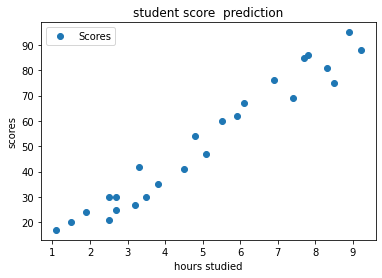

In [155]:
df.plot( x="Hours",y="Scores",style ="o")
plt.title("student score  prediction")
plt.xlabel("hours studied")
plt.ylabel("scores")
plt.plot()

### preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [156]:
X = df.iloc[:, :-1].values

In [157]:
y = df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [158]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
model = LinearRegression()

In [161]:
model.fit(X_train,y_train)

LinearRegression()

In [162]:
print("training completed ")

training completed 


### Find the intercept and coefficient 

In [163]:
 r = model.coef_
print(r)

[9.91065648]


In [164]:
print(model.intercept_)

2.018160041434662


###  Plotting the regression line

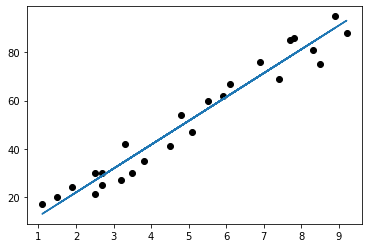

In [165]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,color ="black")
plt.plot(X, line);
plt.show()

 ### Making Predictions¶

In [166]:
y_pred = model.predict(X_test)

In [167]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [168]:
### comparing actual data and predicted data
new_df  = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
new_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Task[Predicting hours = 9.25]

In [169]:
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Evaluate the Model

In [170]:
from sklearn import metrics

In [171]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [172]:
print('Mean Squared Error(Actual-predict)^2 is ',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error(Actual-predict)^2 is  21.598769307217456


In [173]:
print('Root Mean Squared Error Root of(Actual-predict)^2 is  ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error Root of(Actual-predict)^2 is   4.647447612100373
